In [2]:
import pandas as pd

## KMeans 머신러닝 DF_전처리

In [3]:
kMeans_df = pd.read_csv('./data/03.머신러닝_02클러스터링_전처리_전처리완료본.csv',encoding='cp949',index_col=0)

In [4]:
kMeans_df.head()

,userID,user_skintype,user_trouble,main_prd_ingredients,prd_name
0,F0002,건성,민감성/아토피,"병풀잎수, 메틸글루세스-20, 폴리글리세린-3, 병풀추출물, 무화과추출물, 다시마추...","아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토..."
1,F0003,복합성,주름/탄력,"스쿠알란, 하이드롤라이즈드효모추출물, 하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸...","하이드라메모리 세럼, 멀티-펩타이드 + 카퍼 펩타이즈 1% 세럼, 크림스킨, 포 맨..."
2,F0004,중성,잡티/미백/홍조/다크서클,"사과수, 글라이콜릭애씨드, 나이아신아마이드, 소듐하이드록사이드, 판테놀, 소듐하이알...","아하 7 화이트헤드 파워 리퀴드, 레티놀 흔적 리페어 앰플, 1번 진정 맑게담은 청..."
3,F0005,건성,각질,"글리세레스-26, 나이아신아마이드, 아크릴레이트/C10-30알킬아크릴레이트크로스폴리...","파이브 플라워 다크스팟 클리어링 세럼, 브링그린 토닝비타20%빛세럼25mL, 화이트..."
4,F0006,중성,트러블,"달팽이점액여과물, 나이아신아마이드, 판테놀, 자이모모나스발효추출물, 꿀추출물, 하이...","로얄 블랙 스네일 퍼스트 에센스, 모링가 타이트닝 포어 세럼, 레드수딩 시카 밸런스..."


* 인코딩

In [5]:
# 성분 인코딩 셋팅: 모든 화장품의 성분들 모음집 만들기 

# 모든 성분 리스트 만들기 (중복 제거)
all_ingredients = []
all_ingredients = list(set(ingredient.strip() for row in kMeans_df['main_prd_ingredients'] for ingredient in row.split(', ')))

print(all_ingredients)

del all_ingredients[0]
print(all_ingredients)
print(len(all_ingredients))
# 총 1744개의 성분들이 포함되어있다.

['', '다이아이소스테아 릴말레이트', '풀루란', '하이 드로제네이티드폴리데센', '다이소듐이디티에이', '포도씨오일', 'C12-13파레스-9', '하이드로제네이티드포스파티딜콜린', '하이드로제네이티드다이데센', '참당귀 뿌리추출물', '히비스커스꽃추출물', '서양톱풀추출물', '글루코실루틴', '비스-피이지-18메틸에터다이메틸실레인', '디소듐이디티에이', '소듐글리세로포스페이트', '라미나리아 오크롤레우카추출물', '락토바실러스발효용해물', '포트마리골드추출물', '필리핀오렌지껍질오일', '피이지-60하이드로제네이티드캐스터오일', '벌독', '모근추출물', '센티드제라늄추출물', '하이드롤라이즈드맥아추출물', '글리세릴이소스테아레이트', '쇠뜨기추출물', '네오펜틸글라이콜다이헵타노에이트', '락토바실러스/부레옥잠발효물', '검은깨추출물', '7-데하이드로콜레스테롤', '카페인', '소듐글루타메이트', '질경이추출물', '귀리커넬오일', '생달나무잎추출물', '나이아신아마이', '에스에이치-올리 고펩타이드-1', '유칼립톨', '노니열매추출물', '밀배아추출물', '모란뿌리추출물', '라미나리아', '클로렐라 불가리스추출물', '마누카잎추출물', '비치스트로베리추출물', '프룩토오스', '아이소이에서 사용하는 에탄올은 식물발효성분입니다', '적색504호', '레틴알', '화이트참파카꽃오일', '효모/감자추출물발효여과물', '레몬향티트리오일', '사철쑥꽃추출물', '녹차추출물,', '3-헥센올', '피피지-26-부테스-26', '피마자씨오일', '시팀 우드검추출물', '하이드록시프로필비스라우라마이드엠이에이', '만니톨', '미리스틱애씨드', '류신', '황색4호', '베타 인', '피씨에이다이메티콘', '오크라열매추출물', '알루미늄/마그네슘하이드록사이드스테아레이트', '세라마이드엔지', '시트룰린', '발삼코파이바수지', '소두구씨오일', '녹차오일', '미네랄솔트', '아가', '피토스테롤', '글', '밀몽화꽃추출물', '폴리락틱애씨드', '베르가못

In [6]:
# ### 잘 분류되지 않은 오류 확인 : 소수의 데이터 존재
# for ingredient in all_ingredients:
#     if "," in ingredient:
#         print(ingredient)

In [7]:
import pandas as pd

# Create a dictionary to hold ingredient counts for each row
ingredient_counts = {idx: {} for idx in range(len(kMeans_df))}

# Populate the dictionary with counts
for idx, ingredients in enumerate(kMeans_df['main_prd_ingredients']):
    for ingredient in ingredients.split(", "):
        if ingredient in ingredient_counts[idx]:
            ingredient_counts[idx][ingredient] += 1
        else:
            ingredient_counts[idx][ingredient] = 1

# Convert the dictionary to a DataFrame
ingredients_df = pd.DataFrame.from_dict(ingredient_counts, orient='index')

# Fill NaN values with 0s (for ingredients that did not appear in some rows)
ingredients_df.fillna(0, inplace=True)

# Ensure that all counts are integers
ingredients_df = ingredients_df.astype(int)

# Join with the original DataFrame
df_prep = pd.concat([kMeans_df, ingredients_df], axis=1)

In [8]:
df_prep.head()

,userID,user_skintype,user_trouble,main_prd_ingredients,prd_name,병풀잎수,메틸글루세스-20,폴리글리세린-3,병풀추출물,무화과추출물,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
0,F0002,건성,민감성/아토피,"병풀잎수, 메틸글루세스-20, 폴리글리세린-3, 병풀추출물, 무화과추출물, 다시마추...","아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토...",1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1,F0003,복합성,주름/탄력,"스쿠알란, 하이드롤라이즈드효모추출물, 하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸...","하이드라메모리 세럼, 멀티-펩타이드 + 카퍼 펩타이즈 1% 세럼, 크림스킨, 포 맨...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,F0004,중성,잡티/미백/홍조/다크서클,"사과수, 글라이콜릭애씨드, 나이아신아마이드, 소듐하이드록사이드, 판테놀, 소듐하이알...","아하 7 화이트헤드 파워 리퀴드, 레티놀 흔적 리페어 앰플, 1번 진정 맑게담은 청...",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,F0005,건성,각질,"글리세레스-26, 나이아신아마이드, 아크릴레이트/C10-30알킬아크릴레이트크로스폴리...","파이브 플라워 다크스팟 클리어링 세럼, 브링그린 토닝비타20%빛세럼25mL, 화이트...",0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,F0006,중성,트러블,"달팽이점액여과물, 나이아신아마이드, 판테놀, 자이모모나스발효추출물, 꿀추출물, 하이...","로얄 블랙 스네일 퍼스트 에센스, 모링가 타이트닝 포어 세럼, 레드수딩 시카 밸런스...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# 데이터 검증

# df_prep 데이터프레임의 5번째 열부터 모든 값이 5를 초과하는지 확인
values_over_5 = (df_prep.iloc[:, 5:] > 5).any().any()
print(values_over_5)
# 결과: 존재함.

# df_prep의 5번째 열부터 모든 값 중 5를 초과하는 값과 해당 위치 찾기
over_5_locations = df_prep.iloc[:, 5:][df_prep.iloc[:, 5:] > 5]

# 5를 초과하는 값이 있는 셀의 위치와 값을 추출
over_5_values = over_5_locations.stack()
print(over_5_values)

## 원래 인덱스, 해당열 이름, 값이 나와야 하는데, 해당열이름이 공백인 곳에서 5초과 이상치 발견되었다.



True
3         15.0
64         8.0
225       15.0
305        8.0
355       15.0
          ... 
9636       8.0
9641      15.0
9734      15.0
9761       8.0
9787      15.0
Length: 154, dtype: float64


In [10]:
# df_prep에 '' 공백열 존재
'' in df_prep.columns

len(df_prep.columns) # 공백인 열 제거 전
# 공백열 제거
df_prep.drop(columns='',axis=1,inplace=True)
len(df_prep.columns) # 공백인 열 제거 후

1750

In [11]:
df_prep.head()

,userID,user_skintype,user_trouble,main_prd_ingredients,prd_name,병풀잎수,메틸글루세스-20,폴리글리세린-3,병풀추출물,무화과추출물,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
0,F0002,건성,민감성/아토피,"병풀잎수, 메틸글루세스-20, 폴리글리세린-3, 병풀추출물, 무화과추출물, 다시마추...","아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토...",1,1,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1,F0003,복합성,주름/탄력,"스쿠알란, 하이드롤라이즈드효모추출물, 하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸...","하이드라메모리 세럼, 멀티-펩타이드 + 카퍼 펩타이즈 1% 세럼, 크림스킨, 포 맨...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,F0004,중성,잡티/미백/홍조/다크서클,"사과수, 글라이콜릭애씨드, 나이아신아마이드, 소듐하이드록사이드, 판테놀, 소듐하이알...","아하 7 화이트헤드 파워 리퀴드, 레티놀 흔적 리페어 앰플, 1번 진정 맑게담은 청...",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,F0005,건성,각질,"글리세레스-26, 나이아신아마이드, 아크릴레이트/C10-30알킬아크릴레이트크로스폴리...","파이브 플라워 다크스팟 클리어링 세럼, 브링그린 토닝비타20%빛세럼25mL, 화이트...",0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,F0006,중성,트러블,"달팽이점액여과물, 나이아신아마이드, 판테놀, 자이모모나스발효추출물, 꿀추출물, 하이...","로얄 블랙 스네일 퍼스트 에센스, 모링가 타이트닝 포어 세럼, 레드수딩 시카 밸런스...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# 피부타입, 피부고민 열 원핫 인코딩한다.
skintype_encoded = pd.get_dummies(df_prep['user_skintype'], prefix='user_skintype',dtype=int)
trouble_encoded = pd.get_dummies(df_prep['user_trouble'], prefix='user_trouble',dtype=int)

display(skintype_encoded.head())
display(trouble_encoded.head())

,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,0,1,0


,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,user_trouble_트러블
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [13]:
# 인코딩된 열을 원본 데이터와 병합
kMeans_df_encoded = pd.DataFrame()
kMeans_df_encoded = pd.concat([skintype_encoded, trouble_encoded, df_prep], axis=1)

# 인코딩 완료된 df
kMeans_df_encoded.head()

,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# 머신러닝 돌릴 데이터만 복사 후, 필요없는 열 제거
kmeans_clust = kMeans_df_encoded.copy()

kmeans_clust = kmeans_clust.drop(columns=['userID','user_skintype','user_trouble','prd_name','main_prd_ingredients'])
kmeans_clust.head()

,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* 정규화

In [15]:
kmeans_clust.head()

,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Standard_scaler로 맞추기
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터프레임의 열에 스케일링 적용
scaled_data = scaler.fit_transform(kmeans_clust)
# 스케일링된 결과를 새로운 데이터프레임으로 만들기
scaled_df = pd.DataFrame(scaled_data, columns=kmeans_clust.columns)

scaled_df.head()

,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
0,2.021376,-0.494086,-0.496748,-0.507054,-0.507365,-0.446972,2.228450,-0.448582,-0.451153,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
1,-0.494712,-0.494086,2.013095,-0.507054,-0.507365,-0.446972,-0.448742,-0.448582,-0.451153,2.245371,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
2,-0.494712,-0.494086,-0.496748,1.972178,-0.507365,-0.446972,-0.448742,-0.448582,2.216544,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
3,2.021376,-0.494086,-0.496748,-0.507054,-0.507365,2.237276,-0.448742,-0.448582,-0.451153,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
4,-0.494712,-0.494086,-0.496748,1.972178,-0.507365,-0.446972,-0.448742,-0.448582,-0.451153,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566


* 변수 축소 by MCA

In [17]:
# pip install prince

In [18]:
import prince

In [19]:
scaled_df.head()

,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
0,2.021376,-0.494086,-0.496748,-0.507054,-0.507365,-0.446972,2.228450,-0.448582,-0.451153,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
1,-0.494712,-0.494086,2.013095,-0.507054,-0.507365,-0.446972,-0.448742,-0.448582,-0.451153,2.245371,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
2,-0.494712,-0.494086,-0.496748,1.972178,-0.507365,-0.446972,-0.448742,-0.448582,2.216544,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
3,2.021376,-0.494086,-0.496748,-0.507054,-0.507365,2.237276,-0.448742,-0.448582,-0.451153,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566
4,-0.494712,-0.494086,-0.496748,1.972178,-0.507365,-0.446972,-0.448742,-0.448582,-0.451153,-0.445361,...,-0.080261,-0.083359,-0.083359,-0.083359,-0.083359,-0.083359,-0.076383,-0.084566,-0.084566,-0.084566


In [20]:
mca = prince.MCA(n_components=1774)  # 원하는 최대 주성분 개수 설정
mca.fit(scaled_df)

MCA(n_components=1774)

* 변수 개수 확정

In [21]:
mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.024,1.47%,1.47%
1,0.020,1.23%,2.71%
2,0.015,0.92%,3.63%
3,0.014,0.88%,4.51%
4,0.014,0.85%,5.35%
...,...,...,...
1769,0.000,0.00%,100.00%
1770,0.000,0.00%,100.00%
1771,0.000,0.00%,100.00%


In [22]:
mca_summary_all = mca.eigenvalues_summary
mca_summary_all

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.024,1.47%,1.47%
1,0.020,1.23%,2.71%
2,0.015,0.92%,3.63%
3,0.014,0.88%,4.51%
4,0.014,0.85%,5.35%
...,...,...,...
1769,0.000,0.00%,100.00%
1770,0.000,0.00%,100.00%
1771,0.000,0.00%,100.00%


In [23]:
mca_summary_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   eigenvalue                  1774 non-null   object
 1   % of variance               1774 non-null   object
 2   % of variance (cumulative)  1774 non-null   object
dtypes: object(3)
memory usage: 41.7+ KB


In [24]:
# 70% : 326개
mca_summary_all[326:327]

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
326,0.001,0.07%,69.40%


In [25]:
# 80% : 518개
mca_summary_all[518:519]

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
518,0.001,0.04%,79.46%


In [26]:
# 90% : 796개
mca_summary_all[796:797]

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
796,0.001,0.03%,89.54%


In [27]:
# mca 변환
# 70%의 설명력을 가지는 변수 개수(326개)로 선택

mca = prince.MCA(n_components=326)  # 원하는 최대 주성분 개수 설정
mca.fit(scaled_df)

mca_df = mca.row_coordinates(scaled_df)
mca_df

,0,1,2,3,4,5,6,7,8,9,...,316,317,318,319,320,321,322,323,324,325
0,-0.032166,-0.005167,-0.013420,-0.002692,-0.007440,-0.003417,0.050824,-0.046683,0.030380,-0.047943,...,-0.001146,0.027367,-0.012412,-0.029882,0.018573,0.001512,0.042519,-0.000178,-0.004434,-0.007672
1,-0.027632,-0.031278,-0.031451,-0.004202,-0.015182,0.091050,0.068730,-0.049665,-0.022188,-0.014226,...,-0.005829,-0.024772,0.000395,0.013397,0.009834,-0.020059,0.017599,-0.031445,-0.027231,0.010583
2,-0.032759,-0.049022,-0.042071,-0.030757,0.003901,-0.070332,0.017845,-0.018889,0.025888,-0.035773,...,-0.003704,-0.019975,0.003936,-0.014484,-0.011102,-0.007708,0.025520,-0.001434,0.018775,-0.024249
3,-0.033870,-0.022250,-0.033640,0.007913,-0.014304,0.030503,-0.057611,0.003126,0.054170,0.006180,...,0.028123,-0.022277,0.016117,-0.005986,0.013649,0.004838,-0.039694,-0.039656,-0.033924,0.036143
4,-0.032100,-0.045374,-0.037718,-0.011116,-0.007123,-0.004955,0.012381,-0.001725,0.036528,-0.060504,...,-0.020998,0.043025,-0.013086,0.001683,-0.101947,-0.043548,-0.007260,0.017878,-0.001996,-0.046742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-0.034896,-0.014485,-0.036240,-0.033601,0.001190,-0.094824,0.044887,-0.174364,-0.236656,0.212410,...,0.016721,0.029614,-0.013154,0.073683,-0.099244,0.050015,-0.015722,-0.020229,-0.001467,0.008374
9995,-0.037632,-0.040249,-0.029048,-0.042091,0.010169,-0.106635,0.045159,-0.041322,0.027241,-0.024623,...,-0.032031,-0.014446,-0.010279,-0.007297,0.007523,0.002572,0.019961,-0.005820,0.007079,-0.010884
9996,0.027088,-0.077609,0.990434,-0.709455,0.426098,0.222356,-0.108762,0.023541,0.013328,-0.047306,...,-0.012258,-0.005389,0.003668,-0.018553,-0.007282,0.013094,-0.029718,0.012522,0.008728,-0.009245
9997,-0.027203,-0.033426,-0.028773,-0.026862,-0.007373,-0.051081,-0.014715,-0.010593,0.040608,-0.043447,...,0.030142,-0.004873,-0.033639,-0.000586,0.039543,0.002080,0.011126,0.016650,0.036531,0.014508


## Kmeans 머신러닝_시작

In [28]:
# 머신러닝 돌릴 데이터
mca_df

,0,1,2,3,4,5,6,7,8,9,...,316,317,318,319,320,321,322,323,324,325
0,-0.032166,-0.005167,-0.013420,-0.002692,-0.007440,-0.003417,0.050824,-0.046683,0.030380,-0.047943,...,-0.001146,0.027367,-0.012412,-0.029882,0.018573,0.001512,0.042519,-0.000178,-0.004434,-0.007672
1,-0.027632,-0.031278,-0.031451,-0.004202,-0.015182,0.091050,0.068730,-0.049665,-0.022188,-0.014226,...,-0.005829,-0.024772,0.000395,0.013397,0.009834,-0.020059,0.017599,-0.031445,-0.027231,0.010583
2,-0.032759,-0.049022,-0.042071,-0.030757,0.003901,-0.070332,0.017845,-0.018889,0.025888,-0.035773,...,-0.003704,-0.019975,0.003936,-0.014484,-0.011102,-0.007708,0.025520,-0.001434,0.018775,-0.024249
3,-0.033870,-0.022250,-0.033640,0.007913,-0.014304,0.030503,-0.057611,0.003126,0.054170,0.006180,...,0.028123,-0.022277,0.016117,-0.005986,0.013649,0.004838,-0.039694,-0.039656,-0.033924,0.036143
4,-0.032100,-0.045374,-0.037718,-0.011116,-0.007123,-0.004955,0.012381,-0.001725,0.036528,-0.060504,...,-0.020998,0.043025,-0.013086,0.001683,-0.101947,-0.043548,-0.007260,0.017878,-0.001996,-0.046742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,-0.034896,-0.014485,-0.036240,-0.033601,0.001190,-0.094824,0.044887,-0.174364,-0.236656,0.212410,...,0.016721,0.029614,-0.013154,0.073683,-0.099244,0.050015,-0.015722,-0.020229,-0.001467,0.008374
9995,-0.037632,-0.040249,-0.029048,-0.042091,0.010169,-0.106635,0.045159,-0.041322,0.027241,-0.024623,...,-0.032031,-0.014446,-0.010279,-0.007297,0.007523,0.002572,0.019961,-0.005820,0.007079,-0.010884
9996,0.027088,-0.077609,0.990434,-0.709455,0.426098,0.222356,-0.108762,0.023541,0.013328,-0.047306,...,-0.012258,-0.005389,0.003668,-0.018553,-0.007282,0.013094,-0.029718,0.012522,0.008728,-0.009245
9997,-0.027203,-0.033426,-0.028773,-0.026862,-0.007373,-0.051081,-0.014715,-0.010593,0.040608,-0.043447,...,0.030142,-0.004873,-0.033639,-0.000586,0.039543,0.002080,0.011126,0.016650,0.036531,0.014508


In [29]:
from sklearn.cluster import KMeans
import numpy as np

# MCA후, 다시 데이터를 표준화함.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(mca_df)

# K-Means 모델 생성 및 학습/ 5개 그룹으로 분류
kmeans = KMeans(n_clusters = 5, random_state=42, n_init=20)  # 클러스터 개수는 필요에 따라 조절할 수 있습니다.
mca_df["cluster"] = kmeans.fit_predict(X_scaled)

# 각 데이터 포인트에 대한 클러스터 레이블 얻기
labels = kmeans.labels_

# 변수 중요도 확인
cluster_means = mca_df.groupby("cluster").mean()  # 각 클러스터의 변수 평균 계산
cluster_std = mca_df.groupby("cluster").std()  # 각 클러스터의 변수 표준 편차 계산
importance = cluster_means / cluster_std  # 클러스터 간 평균과 표준 편차를 나누어 변수 중요도 계산

importance


,0,1,2,3,4,5,6,7,8,9,...,316,317,318,319,320,321,322,323,324,325
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.030897,0.088850,-0.528933,0.413727,0.215406,0.697189,-1.028417,0.634239,-0.289867,-1.510769,...,0.068887,0.006643,-0.145035,-0.104669,0.156454,0.225828,0.064856,0.142788,0.041871,0.169587
1,-0.023399,-0.204983,-0.545720,-0.301152,-0.017373,-0.251240,-0.143098,-0.118670,0.020884,0.037801,...,-0.094537,0.641394,0.231043,0.229163,0.226290,0.104865,0.222216,-0.171843,-0.248251,0.034693
2,0.038388,-1.150980,0.016098,-0.428093,0.192527,-0.315923,0.170987,0.098440,0.026455,-0.173401,...,-0.036363,0.052505,-0.150952,-0.074810,-0.050614,0.022751,-0.031683,0.128535,-0.135927,0.068714
3,0.038707,0.082436,0.624580,0.018825,-0.011425,-0.171027,-0.277118,0.080670,-0.042056,-0.031139,...,-0.080754,-0.003419,-0.001854,0.019577,-0.084226,0.035947,0.042133,-0.025372,0.015810,-0.035982
4,-0.001078,0.001806,-0.003974,0.002719,-0.001869,0.002040,0.008457,-0.005254,0.001587,0.006761,...,0.001462,-0.003911,0.000268,-0.002966,-0.001817,-0.003147,-0.003102,0.000419,0.002070,-0.001387


In [30]:
kMeans_df['label'] = labels
kMeans_df

,userID,user_skintype,user_trouble,main_prd_ingredients,prd_name,label
0,F0002,건성,민감성/아토피,"병풀잎수, 메틸글루세스-20, 폴리글리세린-3, 병풀추출물, 무화과추출물, 다시마추...","아임쏘리포마이스킨 릴렉싱 앰플, 에이클리어 스팟 포 페이스 세럼, 1025 독도 토...",3
1,F0003,복합성,주름/탄력,"스쿠알란, 하이드롤라이즈드효모추출물, 하이드록시에틸아크릴레이트/소듐아크릴로일다이메틸...","하이드라메모리 세럼, 멀티-펩타이드 + 카퍼 펩타이즈 1% 세럼, 크림스킨, 포 맨...",4
2,F0004,중성,잡티/미백/홍조/다크서클,"사과수, 글라이콜릭애씨드, 나이아신아마이드, 소듐하이드록사이드, 판테놀, 소듐하이알...","아하 7 화이트헤드 파워 리퀴드, 레티놀 흔적 리페어 앰플, 1번 진정 맑게담은 청...",4
3,F0005,건성,각질,"글리세레스-26, 나이아신아마이드, 아크릴레이트/C10-30알킬아크릴레이트크로스폴리...","파이브 플라워 다크스팟 클리어링 세럼, 브링그린 토닝비타20%빛세럼25mL, 화이트...",4
4,F0006,중성,트러블,"달팽이점액여과물, 나이아신아마이드, 판테놀, 자이모모나스발효추출물, 꿀추출물, 하이...","로얄 블랙 스네일 퍼스트 에센스, 모링가 타이트닝 포어 세럼, 레드수딩 시카 밸런스...",4
...,...,...,...,...,...,...
9994,M9986,민감성,각질,"약모밀추출물, 병풀추출물, 케이프알로에잎추출물, 나이아신아마이드, 엑토인, 알란토인...","레드블레미쉬 클리어 수딩 액티브 에센스, 뮤제너 피토 수딩 앰플 대용량 기획, 다이...",4
9995,M9991,지성,트러블,"아세틸헥사펩타이드-8, 트라이소듐에틸렌다이아민다이석시네이트, 젤란검, 소듐클로라이드...","솔루션 10%, 레티놀 0.5% 인 스쿠알란, 1025 독도 토너, 레드 블레미쉬 ...",4
9996,M9992,민감성,잡티/미백/홍조/다크서클,"해수, 하이드롤라이즈드하이알루로닉애씨드, 하이드롤라이즈드콜라겐, 판테놀, 아이리쉬모...","라운드랩 1025 독도 앰플 45g, 온리 포 맨 올인원에센스, 더모이스처 배리어 ...",4
9997,M9993,건성,잡티/미백/홍조/다크서클,"나이아신아마이드, 베타인, 글리세레스-26, 비스-피이지-18메틸에터다이메틸실레인,...","에이지알 글루타치온 글로우 앰플, 아쿠아 이온 플라즈마 수분 앰플, 하이드라비오 토...",4


In [31]:
kMeans_df.to_csv('./data/03.머신러닝_02클러스터링_Kmeans_클러스터링완료본.csv',index=True)

In [32]:
mca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,317,318,319,320,321,322,323,324,325,cluster
0,-0.032166,-0.005167,-0.013420,-0.002692,-0.007440,-0.003417,0.050824,-0.046683,0.030380,-0.047943,...,0.027367,-0.012412,-0.029882,0.018573,0.001512,0.042519,-0.000178,-0.004434,-0.007672,3
1,-0.027632,-0.031278,-0.031451,-0.004202,-0.015182,0.091050,0.068730,-0.049665,-0.022188,-0.014226,...,-0.024772,0.000395,0.013397,0.009834,-0.020059,0.017599,-0.031445,-0.027231,0.010583,4
2,-0.032759,-0.049022,-0.042071,-0.030757,0.003901,-0.070332,0.017845,-0.018889,0.025888,-0.035773,...,-0.019975,0.003936,-0.014484,-0.011102,-0.007708,0.025520,-0.001434,0.018775,-0.024249,4
3,-0.033870,-0.022250,-0.033640,0.007913,-0.014304,0.030503,-0.057611,0.003126,0.054170,0.006180,...,-0.022277,0.016117,-0.005986,0.013649,0.004838,-0.039694,-0.039656,-0.033924,0.036143,4
4,-0.032100,-0.045374,-0.037718,-0.011116,-0.007123,-0.004955,0.012381,-0.001725,0.036528,-0.060504,...,0.043025,-0.013086,0.001683,-0.101947,-0.043548,-0.007260,0.017878,-0.001996,-0.046742,4


In [33]:
mca_df['cluster'].value_counts()

cluster
4    9620
3     140
2     106
1      72
0      61
Name: count, dtype: int64

## 클러스터별 요인분석

In [34]:
kMeans_df_encoded.head()

,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,...,글리세릴이소스테아레이트,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
kMeans_df_encoded['label'] = labels

In [36]:
kMeans_df_encoded

,user_skintype_건성,user_skintype_민감성,user_skintype_복합성,user_skintype_중성,user_skintype_지성,user_trouble_각질,user_trouble_민감성/아토피,user_trouble_블랙헤드/모공,user_trouble_잡티/미백/홍조/다크서클,user_trouble_주름/탄력,...,에스에이치-올리 고펩타이드-1,로우스 위트블루베리추출물,솔비탄세스퀴올리에이 트,피이지-60 하이드로제네이티드캐스터오일,클로페네 신,마누카잎추출물,트라이펩타이드-3,아세틸옥타펩타이드-3,트라이펩타이드-2,label
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
9995,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
9996,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
9997,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4


In [37]:
# 그룹 1 분석
print(len(kMeans_df_encoded.loc[kMeans_df_encoded['label']==0]))

# 피부타입
cluster0_type = kMeans_df_encoded.loc[kMeans_df_encoded['label']==0].iloc[:, 0:5].reset_index(drop=True)
display(cluster0_type.mean())

# 피부고민
cluster0_trouble = kMeans_df_encoded.loc[kMeans_df_encoded['label']==0].iloc[:, 5:11].reset_index(drop=True)
display(cluster0_trouble.mean())

# 성분
cluster0_ingred = kMeans_df_encoded.loc[kMeans_df_encoded['label']==0].iloc[:, 16:-1].reset_index(drop=True)

cluster0_ingred_mean_sorted = cluster0_ingred.mean().sort_values(ascending=False)
cluster0_ingred_mean_sorted_df = pd.DataFrame(cluster0_ingred_mean_sorted, columns=['Mean Value']) # 시리즈를 데이터프레임으로 변환

# 데이터프레임 출력
cluster0_top_ingred = cluster0_ingred_mean_sorted_df[cluster0_ingred_mean_sorted_df['Mean Value']>=2]
cluster0_top_ingred

### 결과: 피부타입과 피부고민은 큰 편차가 없으며, 성분같은 경우는 유의미한 성분은 약 10개로 뽑았다.   

61


user_skintype_건성     0.245902
user_skintype_민감성    0.213115
user_skintype_복합성    0.213115
user_skintype_중성     0.213115
user_skintype_지성     0.114754
dtype: float64

user_trouble_각질               0.213115
user_trouble_민감성/아토피          0.114754
user_trouble_블랙헤드/모공          0.196721
user_trouble_잡티/미백/홍조/다크서클    0.131148
user_trouble_주름/탄력            0.196721
user_trouble_트러블              0.147541
dtype: float64

,Mean Value
에틸헥실글리세린,3.196721
하이드로제네이티드레시틴,2.967213
트로메타민,2.901639
다이소듐이디티에이,2.786885
나이아신아마이드,2.688525
잔탄검,2.590164
판테놀,2.409836
토코페롤,2.377049
알란토인,2.311475
베타인,2.278689


In [38]:
# 그룹 2 분석
print(len(kMeans_df_encoded.loc[kMeans_df_encoded['label']==1]))

# 피부타입
cluster1_type = kMeans_df_encoded.loc[kMeans_df_encoded['label']==1].iloc[:, 0:5].reset_index(drop=True)
display(cluster1_type.mean())

# 피부고민
cluster1_trouble = kMeans_df_encoded.loc[kMeans_df_encoded['label']==1].iloc[:, 5:11].reset_index(drop=True)
display(cluster1_trouble.mean())

# 성분
cluster1_ingred = kMeans_df_encoded.loc[kMeans_df_encoded['label']==1].iloc[:, 16:-1].reset_index(drop=True)

cluster1_ingred_mean_sorted = cluster1_ingred.mean().sort_values(ascending=False)
cluster1_ingred_mean_sorted_df = pd.DataFrame(cluster1_ingred_mean_sorted, columns=['Mean Value']) # 시리즈를 데이터프레임으로 변환

# 데이터프레임 출력
cluster1_top_ingred = cluster1_ingred_mean_sorted_df[cluster1_ingred_mean_sorted_df['Mean Value']>=2]
cluster1_top_ingred

### 결과: 피부타입과 피부고민은 큰 편차가 없으며, 성분같은 경우는 유의미한 성분은 약 5개로 뽑았다.   

72


user_skintype_건성     0.152778
user_skintype_민감성    0.361111
user_skintype_복합성    0.180556
user_skintype_중성     0.097222
user_skintype_지성     0.208333
dtype: float64

user_trouble_각질               0.152778
user_trouble_민감성/아토피          0.152778
user_trouble_블랙헤드/모공          0.125000
user_trouble_잡티/미백/홍조/다크서클    0.263889
user_trouble_주름/탄력            0.180556
user_trouble_트러블              0.125000
dtype: float64

,Mean Value
에틸헥실글리세린,3.361111
소듐하이알루로네이트,3.097222
판테놀,2.194444
하이드롤라이즈드하이알루로닉애씨드,2.152778
다이소듐이디티에이,2.000000


In [39]:
# 그룹 3 분석
print(len(kMeans_df_encoded.loc[kMeans_df_encoded['label']==2]))

# 피부타입
cluster2_type = kMeans_df_encoded.loc[kMeans_df_encoded['label']==2].iloc[:, 0:5].reset_index(drop=True)
display(cluster2_type.mean())

# 피부고민
cluster2_trouble = kMeans_df_encoded.loc[kMeans_df_encoded['label']==2].iloc[:, 5:11].reset_index(drop=True)
display(cluster2_trouble.mean())

# 성분
cluster2_ingred = kMeans_df_encoded.loc[kMeans_df_encoded['label']==2].iloc[:, 16:-1].reset_index(drop=True)

cluster2_ingred_mean_sorted = cluster2_ingred.mean().sort_values(ascending=False)
cluster2_ingred_mean_sorted_df = pd.DataFrame(cluster2_ingred_mean_sorted, columns=['Mean Value']) # 시리즈를 데이터프레임으로 변환

# 데이터프레임 출력
cluster2_top_ingred = cluster2_ingred_mean_sorted_df[cluster2_ingred_mean_sorted_df['Mean Value']>=2]
cluster2_top_ingred

### 결과: 피부타입과 피부고민은 큰 편차가 없으며, 성분같은 경우는 유의미한 성분은 약 7개로 뽑았다.   

106


user_skintype_건성     0.132075
user_skintype_민감성    0.207547
user_skintype_복합성    0.169811
user_skintype_중성     0.264151
user_skintype_지성     0.226415
dtype: float64

user_trouble_각질               0.207547
user_trouble_민감성/아토피          0.160377
user_trouble_블랙헤드/모공          0.141509
user_trouble_잡티/미백/홍조/다크서클    0.188679
user_trouble_주름/탄력            0.150943
user_trouble_트러블              0.150943
dtype: float64

,Mean Value
소듐하이알루로네이트,3.141509
에틸헥실글리세린,2.830189
판테놀,2.735849
잔탄검,2.509434
다이소듐이디티에이,2.481132
나이아신아마이드,2.094340


In [40]:
# 그룹 4 분석
print(len(kMeans_df_encoded.loc[kMeans_df_encoded['label']==3]))

# 피부타입
cluster3_type = kMeans_df_encoded.loc[kMeans_df_encoded['label']==3].iloc[:, 0:5].reset_index(drop=True)
display(cluster3_type.mean())

# 피부고민
cluster3_trouble = kMeans_df_encoded.loc[kMeans_df_encoded['label']==3].iloc[:, 5:11].reset_index(drop=True)
display(cluster3_trouble.mean())

# 성분
cluster3_ingred = kMeans_df_encoded.loc[kMeans_df_encoded['label']==3].iloc[:, 16:-1].reset_index(drop=True)

cluster3_ingred_mean_sorted = cluster3_ingred.mean().sort_values(ascending=False)
cluster3_ingred_mean_sorted_df = pd.DataFrame(cluster3_ingred_mean_sorted, columns=['Mean Value']) # 시리즈를 데이터프레임으로 변환

# 데이터프레임 출력
cluster3_top_ingred = cluster3_ingred_mean_sorted_df[cluster3_ingred_mean_sorted_df['Mean Value']>=2]
cluster3_top_ingred

### 결과: 피부타입과 피부고민은 큰 편차가 없으며, 성분같은 경우는 유의미한 성분은 약 7개로 뽑았다.   

140


user_skintype_건성     0.221429
user_skintype_민감성    0.178571
user_skintype_복합성    0.207143
user_skintype_중성     0.242857
user_skintype_지성     0.150000
dtype: float64

user_trouble_각질               0.214286
user_trouble_민감성/아토피          0.171429
user_trouble_블랙헤드/모공          0.178571
user_trouble_잡티/미백/홍조/다크서클    0.164286
user_trouble_주름/탄력            0.171429
user_trouble_트러블              0.100000
dtype: float64

,Mean Value
에틸헥실글리세린,2.821429
판테놀,2.750000
하이드로제네이티드레시틴,2.464286
소듐하이알루로네이트,2.457143
트로메타민,2.271429
잔탄검,2.228571
카보머,2.071429
토코페롤,2.035714


In [41]:
# 그룹 5 분석
print(len(kMeans_df_encoded.loc[kMeans_df_encoded['label']==4]))

# 피부타입
cluster4_type = kMeans_df_encoded.loc[kMeans_df_encoded['label']==4].iloc[:, 0:5].reset_index(drop=True)
display(cluster4_type.mean())

# 피부고민
cluster4_trouble = kMeans_df_encoded.loc[kMeans_df_encoded['label']==4].iloc[:, 5:11].reset_index(drop=True)
display(cluster4_trouble.mean())

# 성분
cluster4_ingred = kMeans_df_encoded.loc[kMeans_df_encoded['label']==4].iloc[:, 16:-1].reset_index(drop=True)

cluster4_ingred_mean_sorted = cluster4_ingred.mean().sort_values(ascending=False)
cluster4_ingred_mean_sorted_df = pd.DataFrame(cluster4_ingred_mean_sorted, columns=['Mean Value']) # 시리즈를 데이터프레임으로 변환

# 데이터프레임 출력
cluster4_top_ingred = cluster4_ingred_mean_sorted_df[cluster4_ingred_mean_sorted_df['Mean Value']>=3]
cluster4_top_ingred

### 결과: 이 그룹에 있는 사람은 1만명 중 7명만 분류된 그룹이라 값들이 조금 극단적이다.
# 예를 들어 각질과 블랙헤드/모공 피부고민이 아예 나오지 않고, 잡티 피부고민이 40%를 넘어선다.
# 성분같은 경우에도 한 사람 화장대에 한 성분의 개수가 3개를 넘는 성분들이 많다.

9620


user_skintype_건성     0.196985
user_skintype_민감성    0.195010
user_skintype_복합성    0.198129
user_skintype_중성     0.204054
user_skintype_지성     0.205821
dtype: float64

user_trouble_각질               0.165177
user_trouble_민감성/아토피          0.168087
user_trouble_블랙헤드/모공          0.167775
user_trouble_잡티/미백/홍조/다크서클    0.168503
user_trouble_주름/탄력            0.165281
user_trouble_트러블              0.165177
dtype: float64

,Mean Value


In [42]:
#### 성분들 시각화


In [43]:
# 시각화 전, 열 변경

cluster0_top_ingred.reset_index(inplace=True)
cluster0_top_ingred.rename(columns={'index':'ingred','Mean Value':'cluster0_top'},inplace=True)

cluster1_top_ingred.reset_index(inplace=True)
cluster1_top_ingred.rename(columns={'index':'ingred','Mean Value':'cluster1_top'},inplace=True)

cluster2_top_ingred.reset_index(inplace=True)
cluster2_top_ingred.rename(columns={'index':'ingred','Mean Value':'cluster2_top'},inplace=True)

cluster3_top_ingred.reset_index(inplace=True)
cluster3_top_ingred.rename(columns={'index':'ingred','Mean Value':'cluster3_top'},inplace=True)

cluster4_top_ingred.reset_index(inplace=True)
cluster4_top_ingred.rename(columns={'index':'ingred','Mean Value':'cluster4_top'},inplace=True)

/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_1635/3022174555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster0_top_ingred.rename(columns={'index':'ingred','Mean Value':'cluster0_top'},inplace=True)
/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_1635/3022174555.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster1_top_ingred.rename(columns={'index':'ingred','Mean Value':'cluster1_top'},inplace=True)
/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_1635/3022174555.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

In [44]:
cluster1_top_ingred

,ingred,cluster1_top
0,에틸헥실글리세린,3.361111
1,소듐하이알루로네이트,3.097222
2,판테놀,2.194444
3,하이드롤라이즈드하이알루로닉애씨드,2.152778
4,다이소듐이디티에이,2.000000


In [45]:
# 여러 데이터프레임을 merge() 함수로 병합
merged_df = pd.merge(cluster0_top_ingred, cluster1_top_ingred, on='ingred', how='outer')
merged_df = pd.merge(merged_df, cluster2_top_ingred, on='ingred', how='outer')
merged_df = pd.merge(merged_df, cluster3_top_ingred, on='ingred', how='outer')
merged_df = pd.merge(merged_df, cluster4_top_ingred, on='ingred', how='outer')

merged_df.head()

,ingred,cluster0_top,cluster1_top,cluster2_top,cluster3_top,cluster4_top
0,에틸헥실글리세린,3.196721,3.361111,2.830189,2.821429,NaN
1,하이드로제네이티드레시틴,2.967213,NaN,NaN,2.464286,NaN
2,트로메타민,2.901639,NaN,NaN,2.271429,NaN
3,다이소듐이디티에이,2.786885,2.000000,2.481132,NaN,NaN
4,나이아신아마이드,2.688525,NaN,2.094340,NaN,NaN


In [46]:
merged_df = merged_df.fillna(0)
merged_df.head()

,ingred,cluster0_top,cluster1_top,cluster2_top,cluster3_top,cluster4_top
0,에틸헥실글리세린,3.196721,3.361111,2.830189,2.821429,0.0
1,하이드로제네이티드레시틴,2.967213,0.000000,0.000000,2.464286,0.0
2,트로메타민,2.901639,0.000000,0.000000,2.271429,0.0
3,다이소듐이디티에이,2.786885,2.000000,2.481132,0.000000,0.0
4,나이아신아마이드,2.688525,0.000000,2.094340,0.000000,0.0


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
/Users/brielle/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/brielle/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54008 (\N{HANGUL SYLLABLE TIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/brielle/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54757 (\N{HANGUL SYLLABLE HEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/brielle/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/brielle/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py

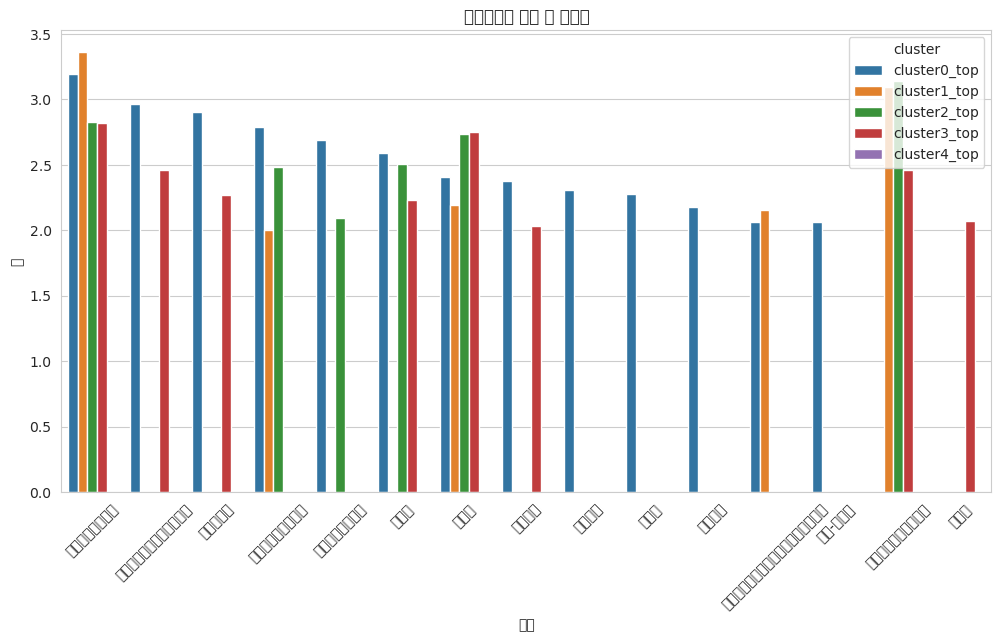

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc


sns.set_style('whitegrid')

# 데이터를 'melt'하여 열을 재구조화
melted_df = merged_df.melt(id_vars=['ingred'], var_name='cluster', value_name='value')

# 시각화
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(12, 6))
sns.barplot(x='ingred', y='value', hue='cluster', data=melted_df)
plt.xticks(rotation=45)
plt.xlabel('성분')
plt.ylabel('값')
plt.title('클러스터별 성분 값 시각화')
plt.show()

In [48]:
# 모든 그룹에서 한사람당 평균적으로 2번 이상 나온 성분들 뽑기
# 그 이유는 그룹을 나눌 때, 유의미 하지 않다고 판단(?? 디시젼트리 변수중요도 다시 봐야될듯..?)

for index, row in merged_df.iterrows():
    if row['cluster0_top']>=2 and row['cluster1_top']>=2 and row['cluster2_top']>=2 and row['cluster3_top']>=2\
        and row['cluster4_top']>=2:
            print(merged_df.loc[index,'ingred'])